<a href="https://colab.research.google.com/github/maya-25/Sentimental-analysis-of-Covid-19-vaccine-tweets/blob/main/Sentimental_analysis_Covid_19_vaccines_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Approach Overview 

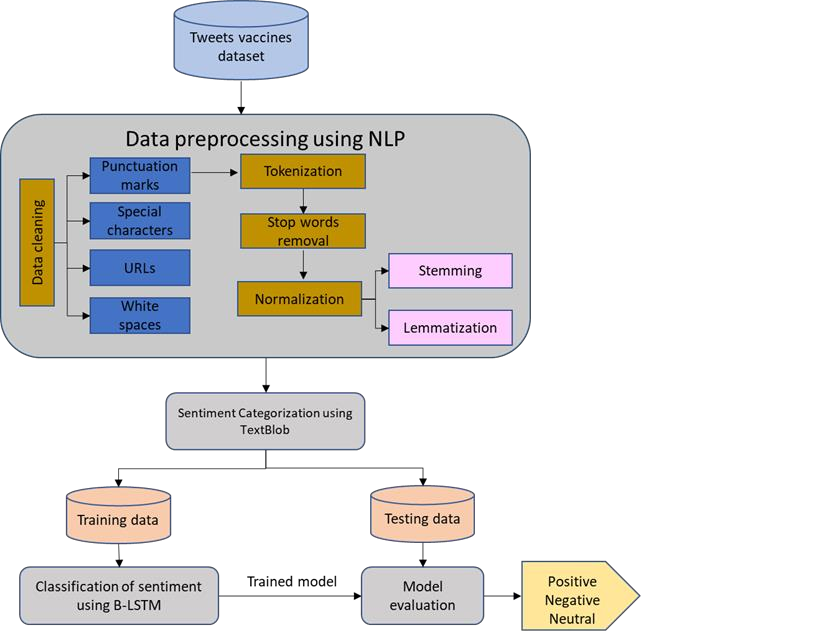


#Connect Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


#Importation Package

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score as AUC

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from keras import backend as K
# from keras.engine.topology import Layer, InputSpec
from keras import initializers
%matplotlib inline

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Read dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Covid-19 vaccine/vaccination_all_tweets.csv")
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


#Preprocessing Step 
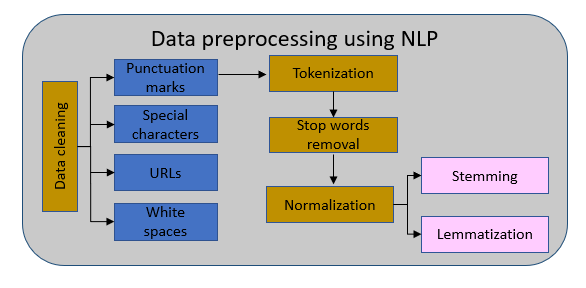

In [ ]:
print(df.columns)
print(df.shape)

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')
(223288, 16)


In [ ]:

df.dropna(subset=['hashtags'], how='all', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174490 entries, 0 to 223287
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                174490 non-null  int64 
 1   user_name         174490 non-null  object
 2   user_location     118447 non-null  object
 3   user_description  161642 non-null  object
 4   user_created      174490 non-null  object
 5   user_followers    174490 non-null  int64 
 6   user_friends      174490 non-null  int64 
 7   user_favourites   174490 non-null  int64 
 8   user_verified     174490 non-null  bool  
 9   date              174490 non-null  object
 10  text              174490 non-null  object
 11  hashtags          174490 non-null  object
 12  source            174443 non-null  object
 13  retweets          174490 non-null  int64 
 14  favorites         174490 non-null  int64 
 15  is_retweet        174490 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
def clean_data(tex):
    tex = re.sub(r'@\w+', ' ', tex)
    tex = re.sub(r'#', ' ', tex)
    tex = re.sub(r'RT[\s]+', ' ', tex)
    tex = re.sub(r'https?:\/\/\S+', ' ', tex)
    tex = tex.lower()
    
    return tex

In [ ]:
df['text'] = df['text'].apply(clean_data)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,explain to me again why we need a vaccine ...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,there have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False


In [ ]:
df['date'] = pd.to_datetime(df['date']).dt.date
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,coronavirus sputnikv astrazeneca pfizerbio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,explain to me again why we need a vaccine ...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12,there have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223283,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-07,18-44 bbmp bengaluru covidvaccine availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
223284,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-07,18-44 bbmp bengaluru covidvaccine availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
223285,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-07,18-44 bbmp bengaluru covidvaccine availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
223286,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-07,18-44 bbmp bengaluru covidvaccine availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False


In [ ]:
df.describe()

,user_followers,user_friends,user_favourites,retweets,favorites
count,1.744900e+05,174490.000000,1.744900e+05,174490.000000,174490.000000
mean,1.117882e+05,1059.577798,1.278104e+04,2.610648,11.685632
std,9.174101e+05,5736.771637,4.074911e+04,53.349989,211.845201
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,8.600000e+01,39.000000,5.800000e+01,0.000000,0.000000
50%,4.260000e+02,252.500000,1.164500e+03,0.000000,0.000000
75%,1.766750e+03,842.000000,7.946750e+03,1.000000,2.000000
max,1.630452e+07,582461.000000,1.299600e+06,11900.000000,51991.000000


In [ ]:
df.drop('is_retweet',
  axis='columns', inplace=True)

#Polarity and Subjectivity calculation Using TextBlob API

In [ ]:
#Sentiment analysis of Covid-19 vaccine tweets.we will use text blob API for finding the polarity and subjectivity.
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()



,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,polarity,subjectivity
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,0.000,0.125000
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,coronavirus sputnikv astrazeneca pfizerbio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,0.000,0.033333
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,explain to me again why we need a vaccine ...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,0.000,0.000000
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,-0.100,0.500000
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12,there have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,0.675,0.587500


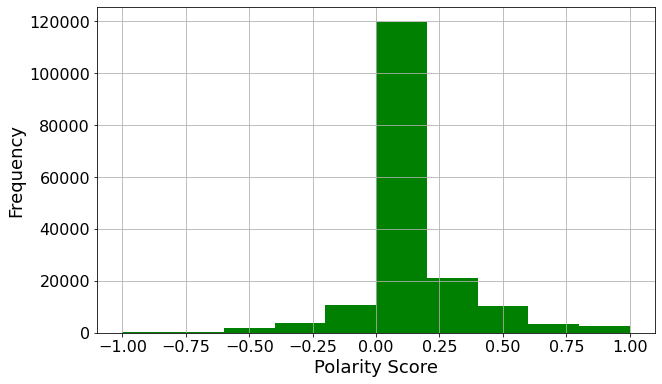

In [ ]:
fig = plt.figure(figsize=(10, 6))
df['polarity'].hist(color='g')
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("/content/drive/MyDrive/Covid-19 vaccine/polarity_hist.png")

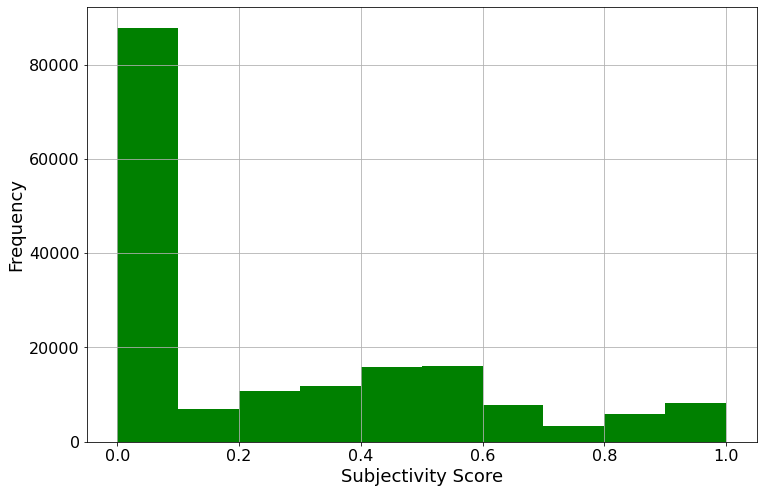

In [ ]:
fig = plt.figure(figsize=(12, 8))
df['subjectivity'].hist(color='g')
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("/content/drive/MyDrive/Covid-19 vaccine/subjectivity_hist.png")

In [ ]:
#inspection of most positive and most positive tweets
df.sort_values(by='polarity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

,text,polarity,subjectivity
0,which is best?\n\nignore tags :-\n freefire f...,1.0,0.30
1,i always said all that covaxin is best.. i ...,1.0,0.30
2,i win the moderna vaccine story of the day!...,1.0,0.40
3,best. day. ever. vaccinated moderna thankyo...,1.0,0.30
4,when are you going to approve sputnikv v...,1.0,0.30
5,"tanzania can do best for you guys, give a tr...",1.0,0.30
6,approve covaxin already!! the safest ...,1.0,0.30
7,excellent work by ayudh volunteers! ...\n cov...,1.0,1.00
8,veryyyyy exciting!!!!! go covaxin!!! let’...,1.0,0.80
9,"this’s fascinating seeing how pfizer, mode...",1.0,0.85


##Remove Emojis

In [ ]:
def deEmojify(tex):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',tex)

In [ ]:
df['text']=df['text'].apply(deEmojify)

#Sentiment analysis Labels distribution




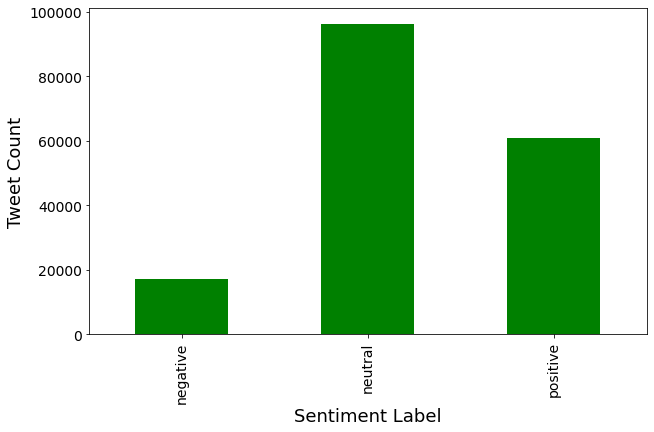

<Figure size 432x288 with 0 Axes>

In [ ]:
# polarity values ranging from -1 to 1 and sunjectivity range from 0 to 1. Converting the data to 3 classes (negative, neutral, and positive)
criteria = [df['polarity'].between(-1, -0.01), df['polarity'].between(-0.01, 0.01), df['polarity'].between(0.01, 1)]
values = ['negative', 'neutral', 'positive']
df['sentiment'] = np.select(criteria, values, 0)

# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().sort_index().plot.bar(color='g')
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()
fig.savefig("/content/drive/MyDrive/Covid-19 vaccine/sentiment_value_counts.png", bbox_inches='tight');

In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,polarity,subjectivity,sentiment
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,0.000,0.125000,neutral
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,coronavirus sputnikv astrazeneca pfizerbio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,0.000,0.033333,neutral
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,explain to me again why we need a vaccine ...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,0.000,0.000000,neutral
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,-0.100,0.500000,negative
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12,there have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,0.675,0.587500,positive


In [ ]:
df.isna().sum()

user_name               0
user_location       56043
user_description    12848
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags                0
source                 47
retweets                0
favorites               0
polarity                0
subjectivity            0
sentiment               0
dtype: int64

In [ ]:
encoding = {'negative': 0,
            'neutral': 1,
            'positive':2
           }

labels = ['Negative', 'Neutral', 'Positive']
           
df.replace(encoding, inplace=True)

In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,polarity,subjectivity,sentiment
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,0.000,0.125000,1
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,coronavirus sputnikv astrazeneca pfizerbio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,0.000,0.033333,1
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,explain to me again why we need a vaccine ...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,0.000,0.000000,1
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,-0.100,0.500000,0
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12,there have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,0.675,0.587500,2


In [ ]:
df.to_csv("/content/drive/MyDrive/Covid-19 vaccine/Dataset_Covid_vaccine_classification.csv")

#Remove stopwords

In [ ]:
def removestopwords(tweet):
  tweet = tweet.split()
  tweet = " ".join([word for word in tweet if not word in stop_words])
    
  return tweet


In [ ]:
stop_words = stopwords.words('english')

df['text'] = df['text'].apply(removestopwords)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,polarity,subjectivity,sentiment
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20,folks said daikon paste could treat cytokine s...,['PfizerBioNTech'],Twitter for Android,0,0,0.000,0.125000,1
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,0.000,0.033333,1
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12,explain need vaccine whereareallthesickpeople ...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,0.000,0.000000,1
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12,bit sad claim fame success vaccination patriot...,['vaccination'],Twitter Web App,0,4,-0.100,0.500000,0
7,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12,many bright days 2020 best 1. bidenharris winn...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,0.675,0.587500,2


In [ ]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'polarity', 'subjectivity', 'sentiment'],
      dtype='object')

In [ ]:
X_data = df['text'].copy()
y_data = df['sentiment'].copy()

In [ ]:
#now tokenise the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)

X = tokenizer.texts_to_sequences(X_data)

vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: {}".format(vocab_size))
print("\nExample:\n")
print("Sentence:\n{}".format(X_data[6]))
print("\nAfter tokenizing :\n{}".format(X[6]))

X = pad_sequences(X, padding='post')
print("\nAfter padding :\n{}".format(X[6]))

Vocabulary size: 78924

Example:

Sentence:
bit sad claim fame success vaccination patriotic competition usa, canada, uk and…

After tokenizing :
[15, 574, 270, 98, 103, 487, 70, 97, 5610, 1228, 315, 24546]

After padding :
[   15   574   270    98   103   487    70    97  5610  1228   315 24546
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0]


#Train and Test Split

In [ ]:
import pickle
pickle.dump(X,open('X-model.pkl','wb'))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.3, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((122143, 27), (52347, 27), (122143,), (52347,))

In [ ]:
def modelEvaluation(predictions, y_test_set):
    #Print model evaluation to predicted result 
    
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    #print "\nAUC score : {:.4f}".format(roc_auc_score(y_test_set, predictions))
    print ("\nClassification report : \n", metrics.classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test_set, predictions))

# Training Phase; Deep learning Models: 

1.   CNN
2.   SingleLSTM
3.   BiLSTM
*texte en italique*



#CNN

In [ ]:
EPOCHS = 2
BATCH_SIZE = 32
embedding_dim = 16
units = 256
from keras import regularizers
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=X_train.shape[1]))
model3.add(tf.keras.layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model3.add(tf.keras.layers.MaxPooling1D(5))
model3.add(tf.keras.layers.GlobalMaxPooling1D())
model3.add(tf.keras.layers.Dense(3,activation='softmax'))
model3.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])
checkpoint3 = ModelCheckpoint("best_model3.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model3.fit(X_train, y_train, epochs=2,validation_data=(X_test, y_test),callbacks=[checkpoint3])

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



3817/3817 [==============================] - 42s 8ms/step - loss: 0.5062 - acc: 0.8262 - val_loss: 0.3725 - val_acc: 0.8840
Epoch 2/2
3817/3817 [==============================] - 31s 8ms/step - loss: 0.2733 - acc: 0.9351 - val_loss: 0.2519 - val_acc: 0.9433


In [ ]:
predict_x=model3.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
loss, acc = model3.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.2519451677799225
Test Accuracy: 0.9433396458625793


In [ ]:
precision_cnn=precision_score(y_test, classes_x, labels=[0,2], average='micro')
recall_cnn = recall_score(y_test, classes_x,  labels=[1,2], average='micro')
accuracy_cnn=accuracy_score(y_test, classes_x)
score_cnn= f1_score(y_test, classes_x, average='micro')

print("Recall:    %.2f%%"  %  ( recall_cnn*100))
print ("Precision:    %.2f%%"  %  (precision_cnn*100))
print("accuracy  %.2f%%"  %  (accuracy_cnn*100))
print("f1-score  %.2f%%"  %  (score_cnn*100))

Recall:    95.97%
Precision:    93.84%
accuracy  94.33%
f1-score  94.33%


#Single LSTM

In [ ]:
tf.keras.backend.clear_session()

from keras import layers
#from tf.keras.optimizers import RMSprop,Adam
model1 = tf.keras.Sequential()

model1.add(layers.Embedding(vocab_size, embedding_dim, input_length=X_train.shape[1]))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(3,activation='softmax'))


model1.compile(optimizer='Adam',loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test),callbacks=[checkpoint1])



Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



3815/3817 [============================>.] - ETA: 0s - loss: 0.4334 - accuracy: 0.8450
Epoch 00001: val_accuracy improved from -inf to 0.93159, saving model to best_model1.hdf5
3817/3817 [==============================] - 47s 12ms/step - loss: 0.4333 - accuracy: 0.8450 - val_loss: 0.2537 - val_accuracy: 0.9316
Epoch 2/5
3814/3817 [============================>.] - ETA: 0s - loss: 0.2390 - accuracy: 0.9286
Epoch 00002: val_accuracy improved from 0.93159 to 0.94055, saving model to best_model1.hdf5
3817/3817 [==============================] - 48s 13ms/step - loss: 0.2390 - accuracy: 0.9287 - val_loss: 0.2181 - val_accuracy: 0.9406
Epoch 3/5
3814/3817 [============================>.] - ETA: 0s - loss: 0.1991 - accuracy: 0.9411
Epoch 00003: val_accuracy improved from 0.94055 to 0.94424, saving model to best_model1.hdf5
3817/3817 [==============================] - 48s 12ms/step - loss: 0.1991 - accuracy: 0.9411 - val_loss: 0.2125 - val_accuracy: 0.9442
Epoch 4/5
3815/3817 [=================

In [ ]:
predict_x2=model1.predict(X_test) 
classes_x2=np.argmax(predict_x2,axis=1)

In [ ]:
loss, acc = model1.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.21389785408973694
Test Accuracy: 0.9429957866668701


In [ ]:
precision_slstm=precision_score(y_test, classes_x2, labels=[0,2], average='micro')
recall_slstm = recall_score(y_test, classes_x2,  labels=[1,2], average='micro')
accuracy_slstm=accuracy_score(y_test, classes_x2)
score_slstm= f1_score(y_test, classes_x2, average='micro')

print("Recall:    %.2f%%"  %  ( recall_slstm*100))
print ("Precision:    %.2f%%"  %  (precision_slstm*100))
print("accuracy  %.2f%%"  %  (accuracy_slstm*100))
print("f1-score  %.2f%%"  %  (score_slstm*100))

Recall:    95.66%
Precision:    93.16%
accuracy  94.30%
f1-score  94.30%


#Bi-LSTM

In [ ]:
tf.keras.backend.clear_session()

# hyper parameters
EPOCHS = 2
BATCH_SIZE = 32
embedding_dim = 16
units = 256

model = tf.keras.Sequential([
    L.Embedding(vocab_size, embedding_dim, input_length=X_train.shape[1]),
    L.Bidirectional(L.LSTM(units,return_sequences=True)),
    L.GlobalMaxPool1D(),
    L.Dropout(0.4),
    L.Dense(64, activation="relu"),
    L.Dropout(0.4),
    L.Dense(3)
])

In [ ]:
#compiling model with loss function and optimiser
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy']
             )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 27, 16)            1262784   
                                                                 
 bidirectional (Bidirectiona  (None, 27, 512)          559104    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 512)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [ ]:
checkpoint = ModelCheckpoint("best_model_COVID.hdf5", monitor='loss', verbose=1,
    save_best_only=False, mode='auto', period=1)

In [ ]:
Covid_model = model.fit(X_train, y_train,epochs=EPOCHS, batch_size=BATCH_SIZE,verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint])


Epoch 1/2
3816/3817 [============================>.] - ETA: 0s - loss: 0.3316 - accuracy: 0.8982
Epoch 00001: saving model to best_model_COVID.hdf5
3817/3817 [==============================] - 99s 25ms/step - loss: 0.3316 - accuracy: 0.8982 - val_loss: 0.2097 - val_accuracy: 0.9426
Epoch 2/2
3817/3817 [==============================] - ETA: 0s - loss: 0.1839 - accuracy: 0.9483
Epoch 00002: saving model to best_model_COVID.hdf5
3817/3817 [==============================] - 93s 24ms/step - loss: 0.1839 - accuracy: 0.9483 - val_loss: 0.2068 - val_accuracy: 0.9421


In [ ]:
predict_x=model.predict(X_test) 
classes_x1=np.argmax(predict_x,axis=1)

In [ ]:
classes_x1

array([1, 1, 1, ..., 2, 1, 1])

In [ ]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.20676957070827484
Test Accuracy: 0.9420596957206726


In [ ]:
print(classification_report(y_test, classes_x1, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.86      0.84      0.85      5186
     Neutral       0.96      0.97      0.96     28921
    Positive       0.94      0.93      0.94     18240

    accuracy                           0.94     52347
   macro avg       0.92      0.91      0.92     52347
weighted avg       0.94      0.94      0.94     52347



In [ ]:
precision_blstm=precision_score(y_test, classes_x1, labels=[0,2], average='micro')
recall_blstm = recall_score(y_test, classes_x1,  labels=[1,2], average='micro')
accuracy_blstm=accuracy_score(y_test, classes_x1)
score_blstm= f1_score(y_test, classes_x1, average='micro')

print("Recall:    %.2f%%"  %  ( recall_blstm*100))
print ("Precision:    %.2f%%"  %  (precision_blstm*100))
print("accuracy  %.2f%%"  %  (accuracy_blstm*100))
print("f1-score  %.2f%%"  %  (score_blstm*100))

Recall:    95.34%
Precision:    92.22%
accuracy  94.21%
f1-score  94.21%


In [ ]:
print(classification_report(y_test, classes_x, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.89      0.79      0.84      5186
     Neutral       0.95      0.98      0.96     28921
    Positive       0.95      0.92      0.94     18240

    accuracy                           0.94     52347
   macro avg       0.93      0.90      0.91     52347
weighted avg       0.94      0.94      0.94     52347



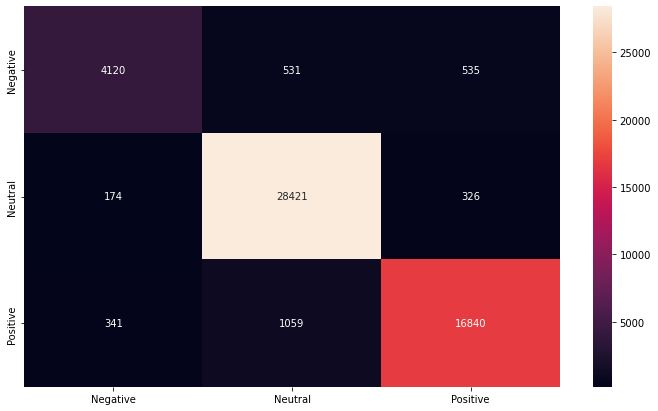

In [ ]:
conf = confusion_matrix(y_test, classes_x)

cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)

plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

# Machine Learning Models: 


1.   Decision Tree
2.   AdaBoost
3.   XGboost
4.   Random Forest
5.   Light GBM
6.   Naive Bayes










#Decision Tree

In [ ]:
decTree = DecisionTreeClassifier(max_depth=8)
decTree.fit(X_train, y_train)
y_decTree_predicted = decTree.predict(X_test)


In [ ]:
precision_dt=precision_score(y_test, y_decTree_predicted, labels=[0,2], average='micro')
recall_dt = recall_score(y_test, y_decTree_predicted,  labels=[1,2], average='micro')
accuracy_dt=accuracy_score(y_test, y_decTree_predicted)
score_dt = f1_score(y_test, y_decTree_predicted, average='micro')

print("Recall:    %.2f%%"  %  ( recall_dt*100))
print ("Precision:    %.2f%%"  %  (precision_dt*100))
print("accuracy  %.2f%%"  %  (accuracy_dt*100))
print("f1-score  %.2f%%"  %  (score_dt*100))

Recall:    68.15%
Precision:    64.08%
accuracy  62.02%
f1-score  62.02%


In [ ]:
modelEvaluation(y_decTree_predicted, y_test)


Accuracy on validation set: 0.6202

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.06      0.12      5186
           1       0.62      0.90      0.73     28921
           2       0.63      0.33      0.43     18240

    accuracy                           0.62     52347
   macro avg       0.72      0.43      0.43     52347
weighted avg       0.65      0.62      0.57     52347


Confusion Matrix : 
 [[  324  4129   733]
 [   20 26095  2806]
 [   12 12181  6047]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [ ]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_test == 1) & (actual_pos)
    false_pos = (y_pred_test == 1) & (actual_neg)
    true_neg = (y_pred_test == 0) & (actual_neg)
    false_neg = (y_pred_test == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred_test == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity, specificity, accuracy

#AdaBoost

In [ ]:
abc= AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=8,min_samples_leaf=1, min_samples_split=2 ), learning_rate=0.01, n_estimators=1000)
abc.fit(X_train, y_train)
y_predadb = abc.predict(X_test)


In [ ]:
precision_ad=precision_score(y_test, y_predadb, labels=[0,2], average='micro')
recall_ad = recall_score(y_test, y_predadb,  labels=[1,2], average='micro')
accuracy_ad=accuracy_score(y_test, y_predadb)
score_ad = f1_score(y_test, y_predadb, average='micro')

print("Recall:    %.2f%%"  %  ( recall_ad*100))
print ("Precision:    %.2f%%"  %  (precision_ad*100))
print("accuracy  %.2f%%"  %  (accuracy_ad*100))
print("f1-score  %.2f%%"  %  (score_ad*100))

Recall:    81.58%
Precision:    82.44%
accuracy  75.26%
f1-score  75.26%


In [ ]:
modelEvaluation(y_predadb, y_test)


Accuracy on validation set: 0.7526

Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.18      0.30      5186
           1       0.73      0.95      0.82     28921
           2       0.82      0.61      0.70     18240

    accuracy                           0.75     52347
   macro avg       0.83      0.58      0.61     52347
weighted avg       0.78      0.75      0.73     52347


Confusion Matrix : 
 [[  925  3249  1012]
 [   33 27407  1481]
 [   29  7145 11066]]


#XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [ ]:
xgboost = XGBClassifier(learning_rate=0.9,n_estimators=500, random_state=256)
xgboost.fit(X_train, y_train)
predxgboost = xgboost.predict(X_test)

In [ ]:

precision_xg=precision_score(y_test, predxgboost, labels=[0,2], average='micro')
recall_xg = recall_score(y_test, predxgboost,  labels=[1,2], average='micro')
accuracy_xg=accuracy_score(y_test, predxgboost)
score_xg = f1_score(y_test, predxgboost, average='micro')

print("Recall:    %.2f%%"  %  ( recall_xg*100))
print ("Precision:    %.2f%%"  %  (precision_xg*100))
print("accuracy  %.2f%%"  %  (accuracy_xg*100))
print("f1-score  %.2f%%"  %  (score_xg*100))



Recall:    84.09%
Precision:    81.91%
accuracy  78.69%
f1-score  78.69%


#RandomForest

In [ ]:
RFC=RandomForestClassifier(n_estimators=500,max_depth=6)
RFC.fit(X_train,y_train)
y_predrf=RFC.predict(X_test)



In [ ]:
precision_gb=precision_score(y_test, y_predrf, labels=[1,2], average='micro')
recall_gb = recall_score(y_test, y_predrf, labels=[1,2],  average='macro')
accuracy_gb=accuracy_score(y_test, y_predrf)
score_gb= f1_score(y_test, y_predrf, average='micro')

print("Recall:    %.2f%%"  %  ( recall_gb*100))
print ("Precision:    %.2f%%"  %  (precision_gb*100))
print("accuracy  %.2f%%"  %  (accuracy_gb*100))
print("f1-score  %.2f%%"  %  (score_gb*100))

Recall:    59.92%
Precision:    61.49%
accuracy  61.62%
f1-score  61.62%


#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC=GradientBoostingClassifier(learning_rate=0.9,n_estimators=500,random_state=6)

GBC.fit(X_train, y_train)


In [ ]:
y_test_predgb = GBC.predict(X_test)


In [ ]:
precision_gbm=precision_score(y_test, y_test_predgb, labels=[1,2], average='micro')
recall_gbm = recall_score(y_test, y_test_predgb, labels=[1,2],  average='macro')
accuracy_gbm=accuracy_score(y_test, y_test_predgb)
score_gbm= f1_score(y_test, y_test_predgb, average='micro')

print("Recall:    %.2f%%"  %  ( recall_gbm*100))
print ("Precision:    %.2f%%"  %  (precision_gbm*100))
print("accuracy  %.2f%%"  %  (accuracy_gbm*100))
print("f1-score  %.2f%%"  %  (score_gbm*100))

#LGBM

In [ ]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm=lgbm.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred_lgbm, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_lgbm)))

In [ ]:
precision_lg=precision_score(y_test, y_pred_lgbm, labels=[0,2], average='micro')
recall_lg = recall_score(y_test, y_pred_lgbm,  labels=[1,2], average='micro')
accuracy_lg=accuracy_score(y_test, y_pred_lgbm)
score_lg = f1_score(y_test, y_pred_lgbm, average='micro')

print("Recall:    %.2f%%"  %  ( recall_lg*100))
print ("Precision:    %.2f%%"  %  (precision_lg*100))
print("accuracy  %.2f%%"  %  (accuracy_lg*100))
print("f1-score  %.2f%%"  %  (score_lg*100))

#Naive Bayes

In [ ]:
Naive = naive_bayes.MultinomialNB()
historyNB = Naive.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(X_test)
modelEvaluation(predictions_NB, y_test)